In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics
import math
import sys
from pylab import *
from math import log
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from generate_data import *
from train_models import *
from honest_trees import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

This notebook is used to run the simulation experiments for fitting sparse linear model with continuous features. The structure of this notebook is as follows: (a) We first fit different tree-based estimators on a linear model with X generated from Uniform([0,1]^d). We then plot the generalisation performance of these different estimators. 

# Examine Generalisation performance for Sparse Linear Models 

In [2]:
def log_list(t):
    return [log(x,math.e) for x in t]

In [3]:
def get_best_fit_line(x,y):
    m, b = np.polyfit(x, y, 1)
    return [m,b]

In [4]:
n_train = [100,250,500,750,1000,1500,2000,2500]
n_test = 500
d = 50
beta = 1
sigma = 0.1
sparsity = [10,20]
n_avg = 25

In [5]:
# Initialize matrix for honest CART 
honest_CART_scores = []
honest_CART_error_bar = []
honest_CART_best_fit = []
#Initialize matrix for honest CART with CCP 
#honest_CART_CCP_scores = []
#honest_CART_CCP_error_bar = []

#Initialize matrix for dishonest CART 
CART_scores = []
CART_error_bar = []
CART_best_fit = []

#Initialize Matrix for dishonest CART with CCP 
#CART_CCP_scores = []
#CART_CCP_error_bar = []

#Initialize Matrix for RF
RF_scores = []
RF_error_bar = []
RF_best_fit = []
#Initialize matrix for theoretical lower bound 


In [ ]:
#This cell's code is used to fit and predict for on linear model varying across the number of training samples/sparsity 
for s in sparsity: 
    honest_CART_s = []
    honest_CART_s_error_bar = []
    
    
    
    #honest_CART_CCP_s = []
    #honest_CART_CCP_s_error_bar = []
    CART_s = []
    CART_s_error_bar = []
  
    
    #CART_CCP_s = []
    #CART_CCP_s_error_bar = []
    
    RF_s = []
    RF_s_error_bar = []

    
    for n in tqdm(n_train):
        honest_CART = []
        #honest_CART_CCP = []
        CART = []
        #CART_CCP = []
        RF = []
        for j in range(n_avg):
            #Create data to fit models 
            X_train = sample_uniform_X(n,d)
            X_honest = sample_uniform_X(n,d)
            X_test = sample_uniform_X(n_test,d)
            
            
            y_train = linear_model(X_train,s,beta,sigma)
            y_honest = linear_model(X_honest,s,beta,sigma)
            y_test = linear_model(X_test,s,beta,0) #zero noise since we want to measure ||\hat{f} - f||_2
            
            
            
            #Fit and predict for all versions of CART
            honest_CART_MSE,CART_MSE =  train_all_models(X_train,y_train,X_honest,y_honest,X_test,y_test,sigma,k = 5)
            honest_CART.append(honest_CART_MSE)
            
            
            
            #honest_CART_CCP.append(honest_CART_CCP_MSE)
            CART.append(CART_MSE)
            #CART_CCP.append(CART_CCP_MSE)
            
            #Fit and predict for RF
            rf = RandomForestRegressor(n_estimators = 100,max_features = 0.33)
            rf.fit(X_train,y_train)
            rf_preds = rf.predict(X_test)
            RF.append(mean_squared_error(y_test,rf_preds))
            
            
            
        #Store Performance in matrix
        honest_CART_s.append(statistics.mean(honest_CART))
        honest_CART_s_error_bar.append(statistics.stdev(honest_CART))
        
        #honest_CART_CCP_s.append(statistics.mean(honest_CART_CCP))
        #honest_CART_CCP_s_error_bar.append(statistics.stdev(honest_CART_CCP))
        
        CART_s.append(statistics.mean(CART))
        CART_s_error_bar.append(statistics.stdev(CART))
        
        #CART_CCP_s.append(statistics.mean(CART_CCP))
        #CART_CCP_s_error_bar.append(statistics.stdev(CART_CCP))
        
        RF_s.append(statistics.mean(RF))
        RF_s_error_bar.append(statistics.stdev(RF))
        

    
    #save results 
    honest_CART_scores.append(honest_CART_s)
    #honest_CART_CCP_scores.append(honest_CART_CCP_s)
    CART_scores.append(CART_s)
    #CART_CCP_scores.append(CART_CCP_s)
    RF_scores.append(RF_s)
    
    
    honest_CART_error_bar.append(honest_CART_s_error_bar)
    #honest_CART_CCP_error_bar.append(honest_CART_CCP_s_error_bar)
    CART_error_bar.append(CART_s_error_bar)
    #CART_CCP_error_bar.append(CART_CCP_s_error_bar) 
    RF_error_bar.append(RF_s_error_bar)


# Save Results 

In [ ]:
honest_CART_results = (honest_CART_scores,honest_CART_error_bar)
with open('results/linear_cts/honestCART.pkl','wb') as f:
    pickle.dump(honest_CART_results, f)

In [ ]:
CART_results = (CART_scores,CART_error_bar)
with open('results/linear_cts/CART.pkl','wb') as f:
    pickle.dump(CART_results,f)

In [ ]:
RF_results = (RF_scores,RF_error_bar)
with open('results/linear_cts/RF.pkl','wb') as f:
    pickle.dump(RF_results,f)

# Load Results 

In [6]:
with open ('results/linear_cts/honestCART.pkl','rb') as f:
    honest_CART_scores,honest_CART_error_bar = pickle.load(f)

In [7]:
with open ('results/linear_cts/CART.pkl','rb') as f:
    CART_scores,CART_error_bar = pickle.load(f)

In [8]:
with open ('results/linear_cts/RF.pkl','rb') as f:
    RF_scores,RF_error_bar = pickle.load(f)

# Best-fit line Slopes

In [9]:
for (i,s) in enumerate(sparsity):
    honest_CART_best_fit.append(get_best_fit_line(log_list(n_train),log_list(honest_CART_scores[i])))
    CART_best_fit.append(get_best_fit_line(log_list(n_train),log_list(CART_scores[i])))
    RF_best_fit.append(get_best_fit_line(log_list(n_train),log_list(RF_scores[i])))

# Plot Results 

In [10]:
import pylab
# Set global plotting parameters
plt.style.use("fivethirtyeight")
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 20
pylab.rcParams['xtick.major.pad'] = 5
pylab.rcParams['ytick.major.pad'] = 5
mpl.rcParams["figure.figsize"] = [8, 6]
mpl.rcParams['savefig.transparent'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'black'
# plt.rcParams['patch.edgecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['grid.color'] = 'black'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

label_size = 25
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size


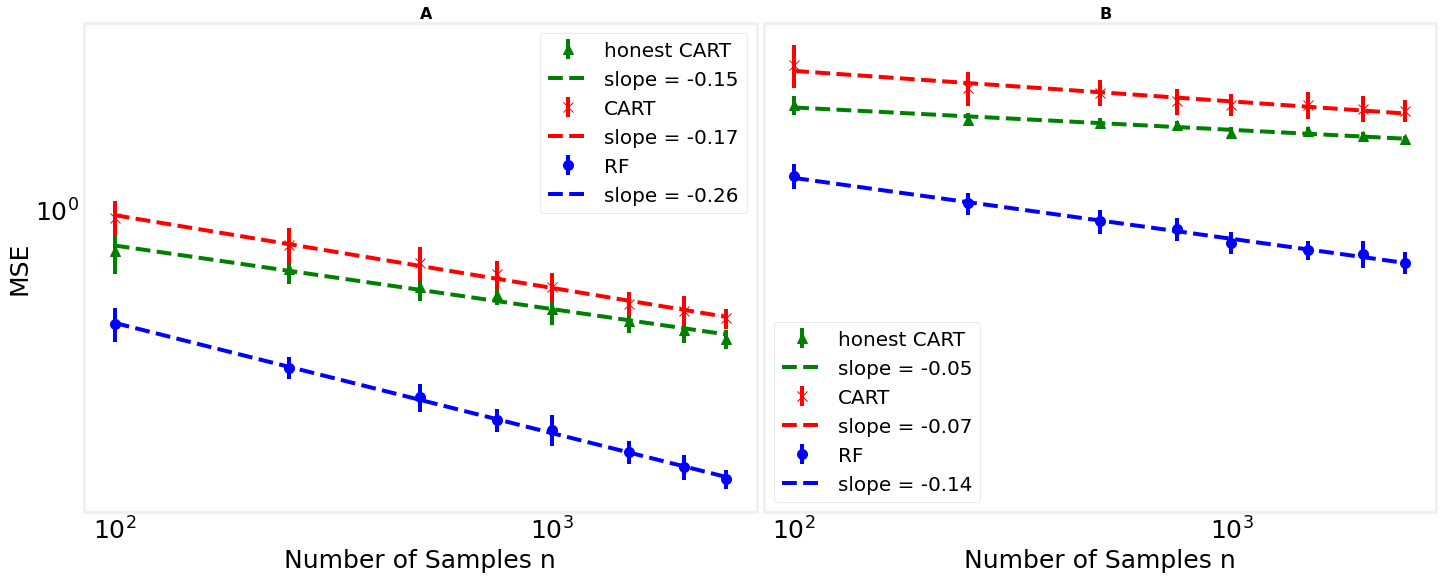

In [15]:
linear_lower_bound_fig,linear_lower_bound_axs = plt.subplots(1,2,figsize = (20,8),sharex = True,sharey = True)


#Plot Performance for different models 

# s = 10
linear_lower_bound_axs[0].errorbar(n_train,honest_CART_scores[0],yerr = honest_CART_error_bar[0],fmt = '^',label = 'honest CART',color = 'green')
linear_lower_bound_axs[0].errorbar(n_train,pow(math.e,honest_CART_best_fit[0][0]*np.array(log_list(n_train))+honest_CART_best_fit[0][1]),linestyle = 'dashed',label = 'slope = ' +str(honest_CART_best_fit[0][0])[:5],color = 'green')

linear_lower_bound_axs[0].errorbar(n_train,CART_scores[0],yerr = CART_error_bar[0],fmt = 'x',label = 'CART',color = 'red')
linear_lower_bound_axs[0].errorbar(n_train,pow(math.e,CART_best_fit[0][0]*np.array(log_list(n_train))+CART_best_fit[0][1]),linestyle = 'dashed',label = 'slope = ' + str(CART_best_fit[0][0])[:5],color = 'red')


linear_lower_bound_axs[0].errorbar(n_train,RF_scores[0],yerr = RF_error_bar[0],fmt = 'o',label = 'RF',color = 'blue')
linear_lower_bound_axs[0].errorbar(n_train,pow(math.e,RF_best_fit[0][0]*np.array(log_list(n_train))+RF_best_fit[0][1]),linestyle = 'dashed',label = 'slope = ' + str(RF_best_fit[0][0])[:5],color = 'blue')



# s = 20 
linear_lower_bound_axs[1].errorbar(n_train,honest_CART_scores[1],yerr = honest_CART_error_bar[0],fmt = '^',label = 'honest CART',color = 'green')
linear_lower_bound_axs[1].errorbar(n_train,pow(math.e,honest_CART_best_fit[1][0]*np.array(log_list(n_train))+honest_CART_best_fit[1][1]),linestyle = 'dashed',label = 'slope = ' +str(honest_CART_best_fit[1][0])[:5],color = 'green')

linear_lower_bound_axs[1].errorbar(n_train,CART_scores[1],yerr = CART_error_bar[1],fmt = 'x',label = 'CART',color = 'red')
linear_lower_bound_axs[1].errorbar(n_train,pow(math.e,CART_best_fit[1][0]*np.array(log_list(n_train))+CART_best_fit[1][1]),linestyle = 'dashed',label = 'slope = ' + str(CART_best_fit[1][0])[:5],color = 'red')


linear_lower_bound_axs[1].errorbar(n_train,RF_scores[1],yerr = RF_error_bar[1],fmt = 'o',label = 'RF',color = 'blue')
linear_lower_bound_axs[1].errorbar(n_train,pow(math.e,RF_best_fit[1][0]*np.array(log_list(n_train))+RF_best_fit[1][1]),linestyle = 'dashed',label = 'slope = ' +str(RF_best_fit[1][0])[:5],color = 'blue')








linear_lower_bound_axs[0].legend(loc = 'best')
linear_lower_bound_axs[1].legend(loc = 'best')

linear_lower_bound_axs[0].text(500.0, 3.15, 'A',
      fontsize=16, fontweight='bold', va='top')
linear_lower_bound_axs[1].text(500.0, 3.15, 'B',
      fontsize=16, fontweight='bold', va='top')
linear_lower_bound_axs[0].set_ylabel('MSE',fontsize = 25)
#linear_lower_bound_axs[1].set_ylabel('MSE',fontsize = 18)

linear_lower_bound_axs[0].set_xlabel('Number of Samples n',fontsize = 25)
linear_lower_bound_axs[1].set_xlabel('Number of Samples n',fontsize = 25)

linear_lower_bound_axs[0].set_yscale('log')
linear_lower_bound_axs[1].set_yscale('log')
linear_lower_bound_axs[0].set_xscale('log')
linear_lower_bound_axs[1].set_xscale('log')

linear_lower_bound_axs[0].grid()
linear_lower_bound_axs[1].grid()


plt.rcParams['legend.fontsize'] = 20

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)

plt.setp(linear_lower_bound_axs, xticks=[100, 500, 1000,2500],yticks=[0.1, 0.5, 1.0])


plt.yscale('log')
plt.xscale('log')


In [16]:
linear_lower_bound_fig.savefig('figures/linear_cts.png')